<a href="https://colab.research.google.com/github/Dansouza-web/-An-lise-de-Dados-Cl-nicos/blob/main/Dados_Cl%C3%ADnicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Qual o objetivo da Análise**?
  ## O objetivo deste projeto é analisar dados clínicos de pacientes com o intuito de detectar padrões que indiquem a ocorrência de um ataque cardíaco. A base contém variáveis fisiológicas como idade, pressão, frequência cardíaca e níveis de enzimas cardíacas.

In [1]:
#Começo importando as bibliotecas que vou utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Dou carga da base e df_clinicos.head() para ter uma primeira impressão da base
df_clinicos = pd.read_csv('Medicaldataset.csv')
df_clinicos.head()

In [ ]:
#Renomeio o nome das colunas para ficar mais fácil a leitura
df_clinicos.columns = ['Idade','Gênero', 'Freq_Cardiaca','Pressão_Arterial_Sistólica','Pressão_Arterial_Diastólica','Nivel_Glicose','Enzima_Cardiaca','Proteina_Cardiaca','Resultado']
df_clinicos

##***FAZENDO ANÁLISE EXPLORÁTORIA***:

In [ ]:
df_clinicos.info()

In [ ]:
df_clinicos.describe().round()

In [ ]:
df_clinicos.isnull().sum() # não há nenhum valor faltante

In [ ]:
df_clinicos

##***TRATAMENTO E LIMPEZA***

In [11]:
#Uso .map do pandas para mudar os valores da coluna Genêro
df_clinicos['Gênero'] = df_clinicos['Gênero'].map({1: 'Masculino', 0: 'Feminino'})
# E o .astype para mudar o tipo de dado do resultado
df_clinicos['Resultado'] = df_clinicos['Resultado'].astype('category')

#***Visualizando Dados com Seaborn***

<Axes: xlabel='Resultado', ylabel='count'>

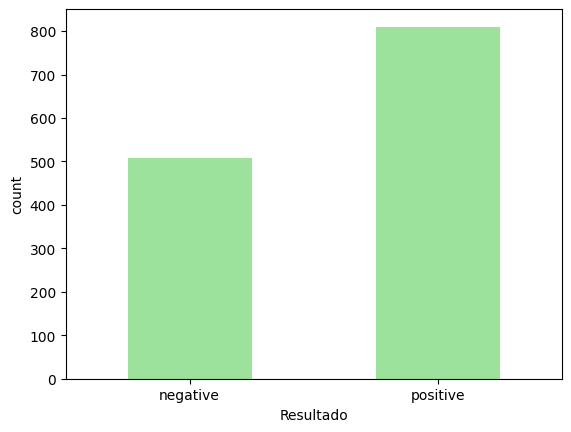

In [42]:
#Distribuição dos Diagnósticos
sns.countplot(x='Resultado', data=df_clinicos,color='lightgreen',width=0.5)

<ipython-input-13-73e1b9faad8c>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Resultado', y='Proteina_Cardiaca', data=df_clinicos, scale='width', color='darkred')


<Axes: xlabel='Resultado', ylabel='Proteina_Cardiaca'>

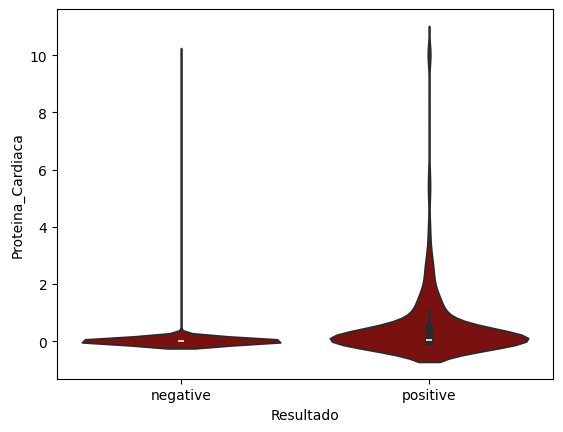

In [13]:
#Proteina Cardiaca por Diagnóstico
sns.violinplot(x='Resultado', y='Proteina_Cardiaca', data=df_clinicos, scale='width', color='darkred')

<Axes: >

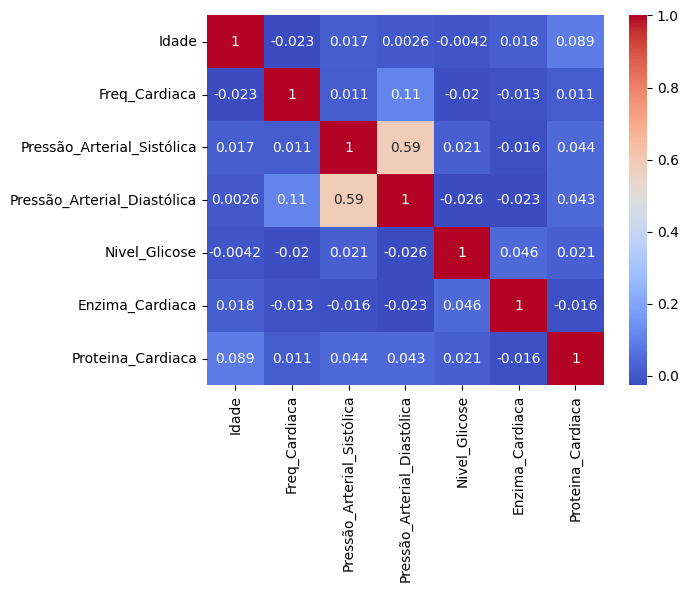

In [14]:
# Verificando se á Correlação
sns.heatmap(df_clinicos.corr(numeric_only=True), annot=True, cmap='coolwarm')

##***ANÁLISE ESTÁTISTICAS E INSIGHT***##

In [ ]:
#Há tendência de frequência mais alta entre positivos?
df_clinicos.groupby('Resultado')['Freq_Cardiaca'].agg(['mean', 'std']).round()

In [ ]:
#Níveis de glicose estão mais elevados em pacientes com infarto?
df_clinicos.groupby('Resultado')['Nivel_Glicose'].agg(['mean', 'median','std'])

<Axes: xlabel='Enzima_Cardiaca', ylabel='Proteina_Cardiaca'>

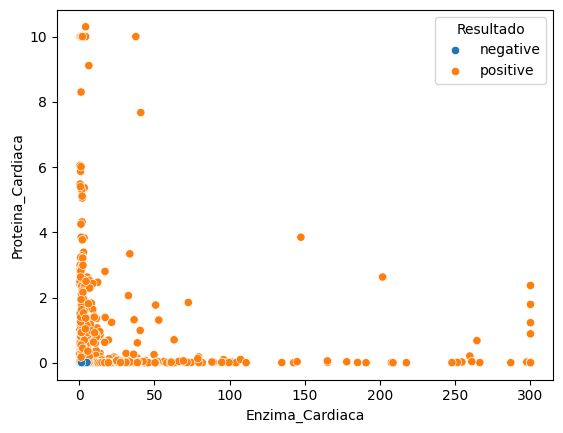

In [17]:
#Quanto maior a Enzima Cardiaca, maior Proteína Cardiaca? Isso vale para os dois grupos?
sns.scatterplot(x='Enzima_Cardiaca',y='Proteina_Cardiaca',hue='Resultado', data=df_clinicos)

In [ ]:
#Pacientes positivos apresentam pressão mais alta ou mais baixa?
df_clinicos.groupby('Resultado')[['Pressão_Arterial_Sistólica','Pressão_Arterial_Diastólica']].mean().round()

#MODELAGEM E ÁRVORE DE DECISÃO

In [20]:
#convertendo dados para 0 e 1 com get dummies
df_clinicos_modelo = pd.get_dummies(df_clinicos,drop_first=True)

In [31]:
#separandoa as váriaveis
y = df_clinicos['Resultado']
X = pd.get_dummies(df_clinicos.drop('Resultado', axis=1), drop_first=True)

In [32]:
#Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#criando o modelo de árvore
modelo = DecisionTreeClassifier(random_state=42,max_depth=4)
modelo.fit(X_train,y_train)

In [ ]:
#Previsando e Avaliando
y_pred = modelo.predict(X_test)
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório da Classificação:\n", classification_report(y_test, y_pred))

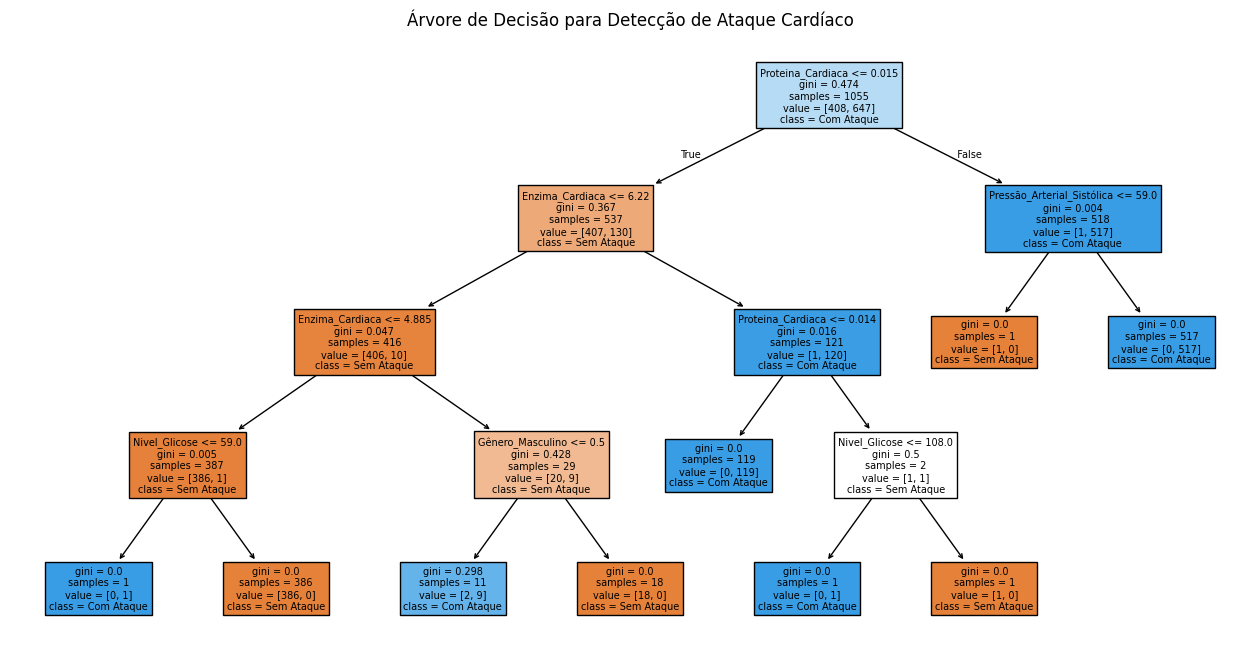

In [35]:
#Visualizando a Árvore de Decisão
plt.figure(figsize=(16,8))
plot_tree(modelo, feature_names=X.columns, class_names=['Sem Ataque', 'Com Ataque'], filled=True)
plt.title("Árvore de Decisão para Detecção de Ataque Cardíaco")
plt.show()

In [ ]:
#Para Descobrir quais foram as variaveis mais importante para a previsão
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=importancias, y=importancias.index, palette='viridis')
plt.title('As Variáveis que Foram mais importantes para a previsão')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()